In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
data = pd.read_csv("C:/Users/SANJAY/Desktop/ExcelR/Assignments/Assignment -  4/Simple Linear Regression/delivery_time.csv")
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
data.shape

(21, 2)

In [4]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


C:\Users\SANJAY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


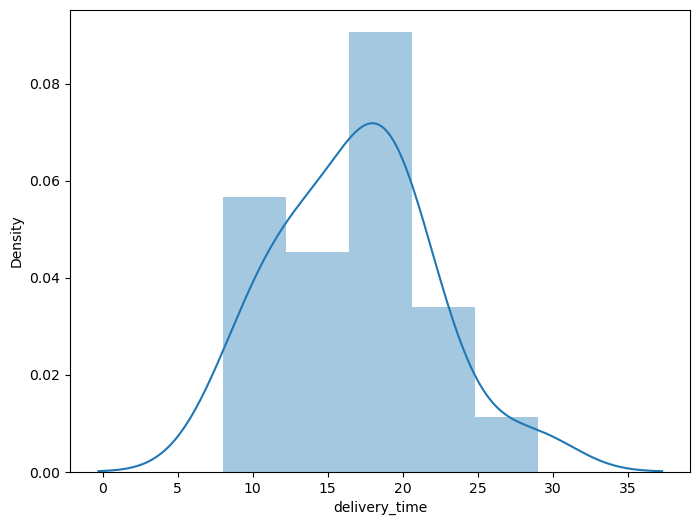

C:\Users\SANJAY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


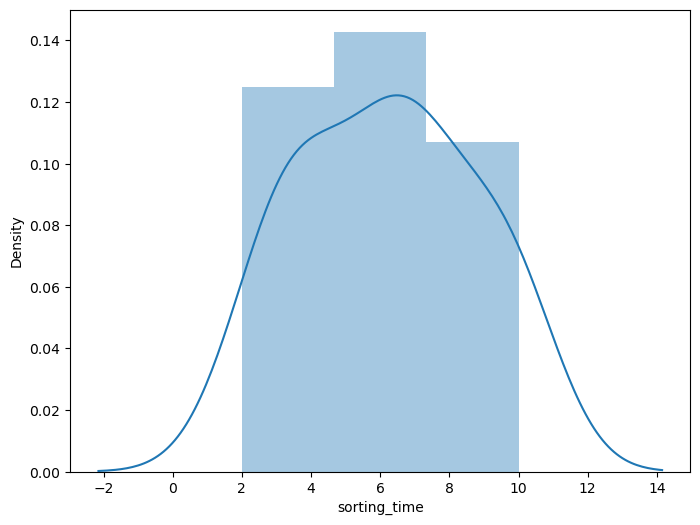

In [6]:
# Renaming Columns
data=data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)

# Checking for outliers with help of boxplot
plt.figure(figsize = (8, 6))
plt.tight_layout()
sns.distplot(data.delivery_time)
plt.show()

plt.figure(figsize = (8, 6))
plt.tight_layout()
sns.distplot(data.sorting_time)
plt.show()

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

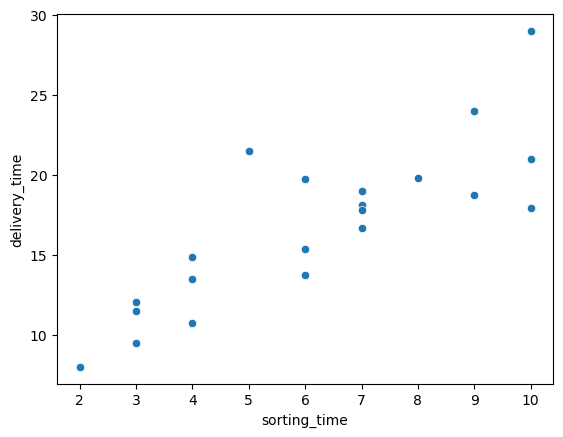

In [7]:
sns.scatterplot(x=data['sorting_time'], y=data['delivery_time'])

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

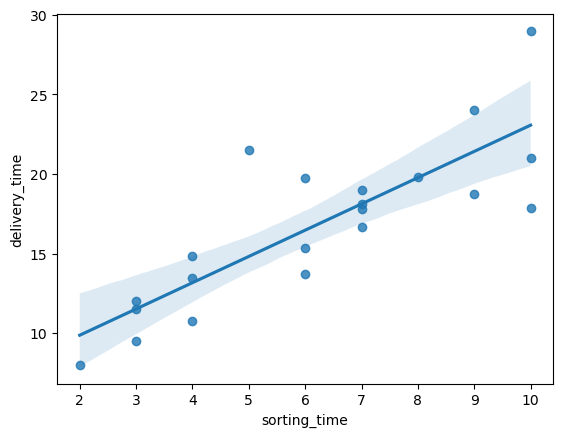

In [8]:
sns.regplot(x = data['sorting_time'], y = data['delivery_time'])

In [9]:
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


In [10]:
model=smf.ols('delivery_time~sorting_time',data = data).fit()

In [11]:
# Coefficients Bo and B1
Bo, B1 = model.params
print("Intercept, Bo: ", Bo)
print("Sorting Time, B1: ", B1)

# Getting tvalue and pvalue
tvalue, pvalue = (model.tvalues, model.pvalues)
print("tvalue: ", tvalue)
print("pvalue: ", pvalue)

# Getting R squared values
r_sq, r_sq_adj = (model.rsquared, model.rsquared_adj)
print("R2: ", r_sq)
print("R2_Adj: ", r_sq_adj)

Intercept, Bo:  6.582733971997054
Sorting Time, B1:  1.6490198968312457
tvalue:  Intercept       3.823349
sorting_time    6.387447
dtype: float64
pvalue:  Intercept       0.001147
sorting_time    0.000004
dtype: float64
R2:  0.6822714748417231
R2_Adj:  0.6655489208860244


In [12]:
#Checking predictions of Model by equation

predicted_time = model.predict(data.sorting_time)

pred_df = pd.DataFrame({'Delivery_Time_Actual' : data.delivery_time, 'Delivery_Time_Predicted' : predicted_time})
pred_df

,Delivery_Time_Actual,Delivery_Time_Predicted
0,21.00,23.072933
1,13.50,13.178814
2,19.75,16.476853
3,24.00,21.423913
4,29.00,23.072933
5,15.35,16.476853
6,19.00,18.125873
7,9.50,11.529794
8,17.90,23.072933
9,18.75,21.423913


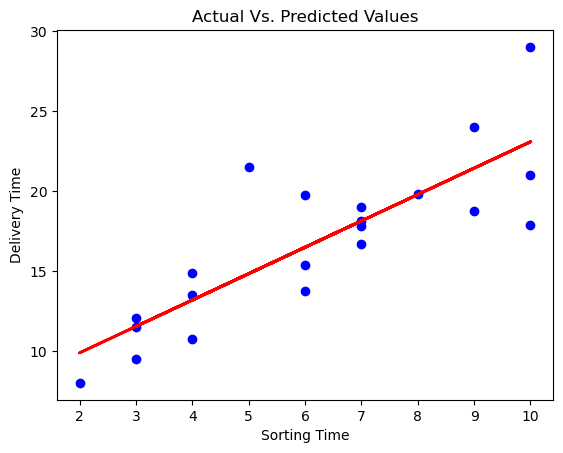

In [13]:
# Plotting Actual Vs. Predicted Values
plt.scatter(data.sorting_time, data.delivery_time,  color='blue')
plt.plot(data.sorting_time, predicted_time, color='red', linewidth=2)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

# Calculating Errors

In [14]:

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(data.delivery_time, predicted_time))  
print('Mean Squared Error:', metrics.mean_squared_error(data.delivery_time, predicted_time))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(data.delivery_time, predicted_time)))
print("R^2 Score :          ", metrics.r2_score(data.delivery_time, predicted_time))

Mean Absolute Error: 2.085740955188266
Mean Squared Error: 7.793311548584062
Root Mean Squared Error: 2.7916503270617654
R^2 Score :           0.6822714748417231


In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 07 Feb 2023   Prob (F-statistic):           3.98e-06
Time:                        18:53:47   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Building model with Logarithmic Transformation : 

In [16]:
# Preparing data for model building
data1 = pd.DataFrame.copy(data)
data1['log_sorting_time'] = np.log(data1.sorting_time)
data1.head()

,delivery_time,sorting_time,log_sorting_time
0,21.00,10,2.302585
1,13.50,4,1.386294
2,19.75,6,1.791759
3,24.00,9,2.197225
4,29.00,10,2.302585


In [17]:
# Building model
log_model = smf.ols('delivery_time ~ log_sorting_time', data = data1).fit()

In [18]:
# Coefficients Bo and B1
Bo, B1 = log_model.params
print("Intercept, Bo: ", Bo)
print("Sorting Time, B1: ", B1)

# Getting tvalue and pvalue
tvalue, pvalue = (log_model.tvalues, log_model.pvalues)
print("tvalue: ", tvalue)
print("pvalue: ", pvalue)

# Getting R squared values
r_sq, r_sq_adj = (log_model.rsquared, log_model.rsquared_adj)
print("R2: ", r_sq)
print("R2_Adj: ", r_sq_adj)

Intercept, Bo:  1.1596835115465822
Sorting Time, B1:  9.04341345820576
tvalue:  Intercept           0.472460
log_sorting_time    6.586789
dtype: float64
pvalue:  Intercept           0.641980
log_sorting_time    0.000003
dtype: float64
R2:  0.6954434611324223
R2_Adj:  0.6794141696130761


In [19]:
# Checking predictions of Model by equation

predicted_time = log_model.predict(data1.log_sorting_time)
pred_df = pd.DataFrame({'Delivery_Time_Actual' : data1.delivery_time, 'Delivery_Time_Predicted' : predicted_time})
pred_df

,Delivery_Time_Actual,Delivery_Time_Predicted
0,21.00,21.982913
1,13.50,13.696517
2,19.75,17.363305
3,24.00,21.030094
4,29.00,21.982913
5,15.35,17.363305
6,19.00,18.757354
7,9.50,11.094889
8,17.90,21.982913
9,18.75,21.030094


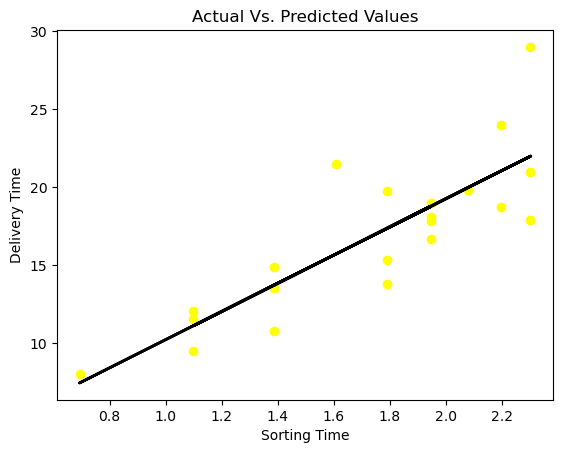

In [20]:
# Plotting Actual Vs. Predicted Values
plt.scatter(data1.log_sorting_time, data1.delivery_time,  color='yellow')
plt.plot(data1.log_sorting_time, predicted_time, color='black', linewidth=2)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

# Calculating Errors

In [21]:
print('Mean Absolute Error:', metrics.mean_absolute_error(data1.delivery_time, predicted_time))  
print('Mean Squared Error:', metrics.mean_squared_error(data1.delivery_time, predicted_time))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(data1.delivery_time, predicted_time)))
print("R^2 Score :          ", metrics.r2_score(data1.delivery_time, predicted_time))

Mean Absolute Error: 2.0473757067928986
Mean Squared Error: 7.470226320948427
Root Mean Squared Error: 2.7331714766820663
R^2 Score :           0.6954434611324223


In [22]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Tue, 07 Feb 2023   Prob (F-statistic):           2.64e-06
Time:                        18:53:47   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.1597      2.455      0.472      0.642      -3.978       6.297
log_sorting_time     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Building model with exponential transformation

In [23]:
# preparing data to build exponential model
data1['log_delivery_time'] = np.log(data1.delivery_time)
data1.head()

,delivery_time,sorting_time,log_sorting_time,log_delivery_time
0,21.00,10,2.302585,3.044522
1,13.50,4,1.386294,2.602690
2,19.75,6,1.791759,2.983153
3,24.00,9,2.197225,3.178054
4,29.00,10,2.302585,3.367296


In [24]:
# Building model
exp_model = smf.ols('log_delivery_time ~ sorting_time', data = data1).fit()

In [25]:
# Coefficients Bo and B1
Bo, B1 = exp_model.params
print("Intercept, Bo: ", Bo)
print("Sorting Time, B1: ", B1)

# Getting tvalue and pvalue
tvalue, pvalue = (exp_model.tvalues, exp_model.pvalues)
print("tvalue: ", tvalue)
print("pvalue: ", pvalue)

# Getting R squared values
r_sq, r_sq_adj = (exp_model.rsquared, exp_model.rsquared_adj)
print("R2: ", r_sq)
print("R2_Adj: ", r_sq_adj)

Intercept, Bo:  2.121371854893524
Sorting Time, B1:  0.10555159794344435
tvalue:  Intercept       20.601357
sorting_time     6.836088
dtype: float64
pvalue:  Intercept       1.857343e-14
sorting_time    1.592708e-06
dtype: float64
R2:  0.7109478980584187
R2_Adj:  0.6957346295351776


In [26]:
# Checking predictions of Model by equation
predicted_time = exp_model.predict(data1.sorting_time)
pred_df = pd.DataFrame({'Delivery_Time_Actual' : data1.log_delivery_time, 'Delivery_Time_Predicted' : predicted_time})
pred_df

,Delivery_Time_Actual,Delivery_Time_Predicted
0,3.044522,3.176888
1,2.602690,2.543578
2,2.983153,2.754681
3,3.178054,3.071336
4,3.367296,3.176888
5,2.731115,2.754681
6,2.944439,2.860233
7,2.251292,2.438027
8,2.884801,3.176888
9,2.931194,3.071336


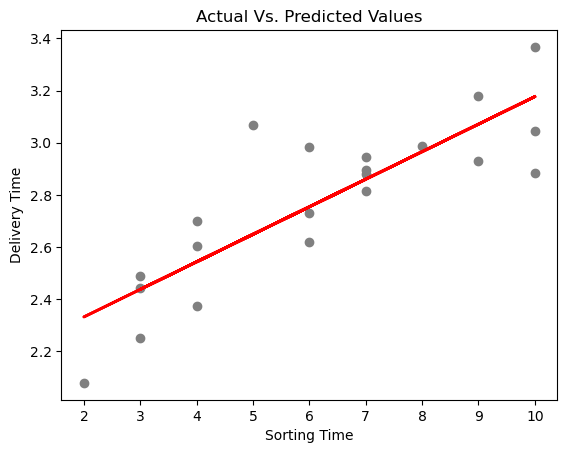

In [27]:
# Plotting Actual Vs. Predicted Values
plt.scatter(data1.sorting_time, data1.log_delivery_time,  color='gray')
plt.plot(data1.sorting_time, predicted_time, color='red', linewidth=2)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

# Calculating Errors

In [28]:
print('Mean Absolute Error:', metrics.mean_absolute_error(data1.log_delivery_time, predicted_time))  
print('Mean Squared Error:', metrics.mean_squared_error(data1.log_delivery_time, predicted_time))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(data1.log_delivery_time, predicted_time)))
print("R^2 Score :          ", metrics.r2_score(data1.log_delivery_time, predicted_time))

Mean Absolute Error: 0.1310730556090563
Mean Squared Error: 0.027876563581789988
Root Mean Squared Error: 0.16696276106302863
R^2 Score :           0.7109478980584187


In [29]:
pred_df = pd.DataFrame({'Actual': np.exp(data1.log_delivery_time), 'Predicted': np.exp(predicted_time)})
pred_df

,Actual,Predicted
0,21.00,23.972032
1,13.50,12.725123
2,19.75,15.716034
3,24.00,21.570707
4,29.00,23.972032
5,15.35,15.716034
6,19.00,17.465597
7,9.50,11.450423
8,17.90,23.972032
9,18.75,21.570707


In [30]:
exp_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      log_delivery_time   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Tue, 07 Feb 2023   Prob (F-statistic):           1.59e-06
Time:                        18:53:47   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Building model with square root transformation¶


In [31]:
# preparing data to build model
data1['sqrt_delivery_time'] = np.sqrt(data1.delivery_time)
data1.head()

,delivery_time,sorting_time,log_sorting_time,log_delivery_time,sqrt_delivery_time
0,21.00,10,2.302585,3.044522,4.582576
1,13.50,4,1.386294,2.602690,3.674235
2,19.75,6,1.791759,2.983153,4.444097
3,24.00,9,2.197225,3.178054,4.898979
4,29.00,10,2.302585,3.367296,5.385165


In [32]:
# Building model
sqrt_model = smf.ols('sqrt_delivery_time ~ sorting_time', data = data1).fit()

In [33]:
# Coefficients Bo and B1
Bo, B1 = sqrt_model.params
print("Intercept, Bo: ", Bo)
print("Sorting Time, B1: ", B1)

# Getting tvalue and pvalue
tvalue, pvalue = (sqrt_model.tvalues, sqrt_model.pvalues)
print("tvalue: ", tvalue)
print("pvalue: ", pvalue)

# Getting R squared values
r_sq, r_sq_adj = (sqrt_model.rsquared, sqrt_model.rsquared_adj)
print("R2: ", r_sq)
print("R2_Adj: ", r_sq_adj)

Intercept, Bo:  2.7727310393450333
Sorting Time, B1:  0.2066318180457749
tvalue:  Intercept       13.527452
sorting_time     6.723095
dtype: float64
pvalue:  Intercept       3.339366e-11
sorting_time    2.001215e-06
dtype: float64
R2:  0.704049871541756
R2_Adj:  0.6884735489913221


In [34]:
# Checking predictions of Model by equation
predicted_time = sqrt_model.predict(data1.sorting_time)
pred_df = pd.DataFrame({'Delivery_Time_Actual' : data1.sqrt_delivery_time, 'Delivery_Time_Predicted' : predicted_time})
pred_df

,Delivery_Time_Actual,Delivery_Time_Predicted
0,4.582576,4.839049
1,3.674235,3.599258
2,4.444097,4.012522
3,4.898979,4.632417
4,5.385165,4.839049
5,3.917908,4.012522
6,4.358899,4.219154
7,3.082207,3.392626
8,4.230839,4.839049
9,4.330127,4.632417


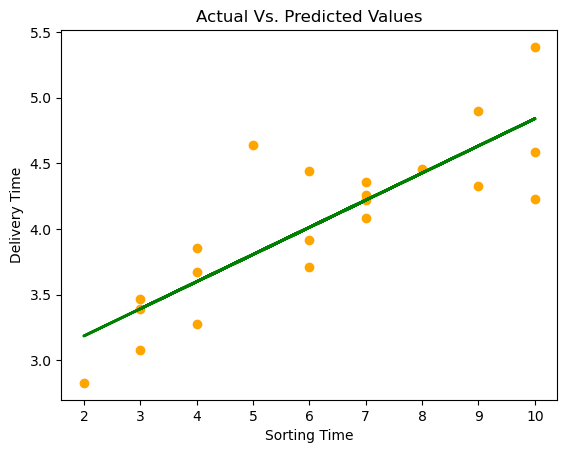

In [35]:
# Plotting Actual Vs. Predicted Values
plt.scatter(data1.sorting_time, data1.sqrt_delivery_time,  color='orange')
plt.plot(data1.sorting_time, predicted_time, color='green', linewidth=2)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

# Calculating Errors

In [36]:
print('Mean Absolute Error:', metrics.mean_absolute_error(data1.sqrt_delivery_time, predicted_time))  
print('Mean Squared Error:', metrics.mean_squared_error(data1.sqrt_delivery_time, predicted_time))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(data1.sqrt_delivery_time, predicted_time)))
print("R^2 Score :          ", metrics.r2_score(data1.sqrt_delivery_time, predicted_time))

Mean Absolute Error: 0.2562892192762892
Mean Squared Error: 0.11045382417324963
Root Mean Squared Error: 0.33234594050965877
R^2 Score :           0.7040498715417561


In [37]:
pred_df = pd.DataFrame({'Actual': (data1.sqrt_delivery_time)**2, 'Predicted': (predicted_time)**2})
pred_df

,Actual,Predicted
0,21.00,23.416397
1,13.50,12.954660
2,19.75,16.100332
3,24.00,21.459291
4,29.00,23.416397
5,15.35,16.100332
6,19.00,17.801258
7,9.50,11.509915
8,17.90,23.416397
9,18.75,21.459291


In [38]:
sqrt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     sqrt_delivery_time   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     45.20
Date:                Tue, 07 Feb 2023   Prob (F-statistic):           2.00e-06
Time:                        18:53:48   Log-Likelihood:                -6.6646
No. Observations:                  21   AIC:                             17.33
Df Residuals:                      19   BIC:                             19.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.7727      0.205     13.527      0.000       2.344       3.202
sorting_time     0.2066      0.031      6.723      0.000       0.142       0.271
==============================================================================
Omnibus:                        2.228   Durbin-Watson:                   1.258
Prob(Omnibus):                  0.328   Jarque-Bera (JB):                1.195
Skew:                           0.580   Prob(JB):                        0.550
Kurtosis:                       3.142   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""